
1H Returns Stats
count    122027.000000
mean          0.000020
std           0.002258
min          -0.052632
25%          -0.000825
50%           0.000000
75%           0.000890
max           0.042236
Name: Return, dtype: float64

1D Returns Stats
count    5390.000000
mean        0.000461
std         0.010775
min        -0.090621
25%        -0.004864
50%         0.000577
75%         0.006120
max         0.109897
Name: Return, dtype: float64


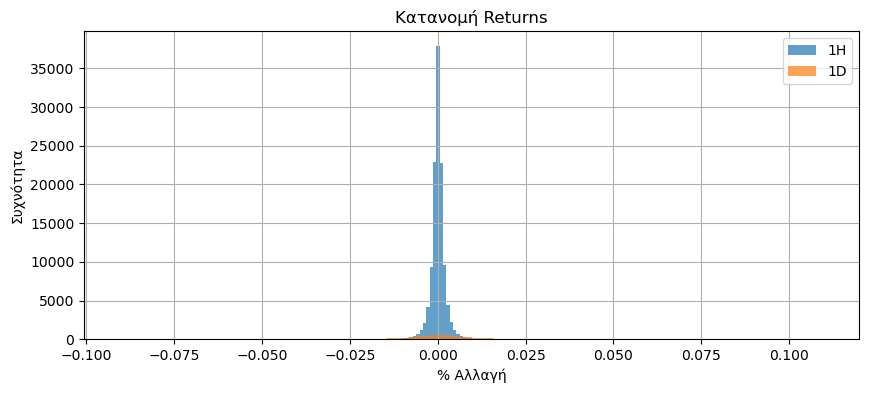

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro, jarque_bera, probplot

df_1h = pd.read_csv('../data/XAU_1h_clean.csv', index_col='Date', parse_dates=True)
df_1d = pd.read_csv('../data/XAU_1d_clean.csv', index_col='Date', parse_dates=True)

print("\n1H Returns Stats")
print(df_1h['Return'].describe())

print("\n1D Returns Stats")
print(df_1d['Return'].describe())

df_1h['Return'].hist(bins=100, figsize=(10,4), alpha=0.7, label='1H')
df_1d['Return'].hist(bins=100, figsize=(10,4), alpha=0.7, label='1D')
plt.legend()
plt.title("Κατανομή Returns")
plt.xlabel("% Αλλαγή")
plt.ylabel("Συχνότητα")
plt.grid(True)
plt.show()


In [ ]:
# Skewness & Kurtosis 
print("\nSkewness & Kurtosis:")
print("1H skew:", skew(df_1h['Return'].dropna()))
print("1H kurtosis:", kurtosis(df_1h['Return'].dropna()))
print("1D skew:", skew(df_1d['Return'].dropna()))
print("1D kurtosis:", kurtosis(df_1d['Return'].dropna()))



Skewness & Kurtosis:
1H skew: -0.15926581959684274
1H kurtosis: 21.077895251327515
1D skew: -0.18489267971751908
1D kurtosis: 5.909133883353553


In [3]:
# Normality Tests 
print("\nShapiro Test:")
print("1H:", shapiro(df_1h['Return'].dropna().sample(5000)))
print("1D:", shapiro(df_1d['Return'].dropna()))

print("\nJarque-Bera Test:")
print("1H:", jarque_bera(df_1h['Return'].dropna()))
print("1D:", jarque_bera(df_1d['Return'].dropna()))




Shapiro Test:
1H: ShapiroResult(statistic=0.7962984786332264, pvalue=6.177660050676391e-62)
1D: ShapiroResult(statistic=0.9501374823418542, pvalue=2.1900680907263332e-39)

Jarque-Bera Test:
1H: SignificanceResult(statistic=2259427.1738967304, pvalue=0.0)
1D: SignificanceResult(statistic=7872.679919083042, pvalue=0.0)


/opt/anaconda3/envs/dpenv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5390.
  res = hypotest_fun_out(*samples, **kwds)


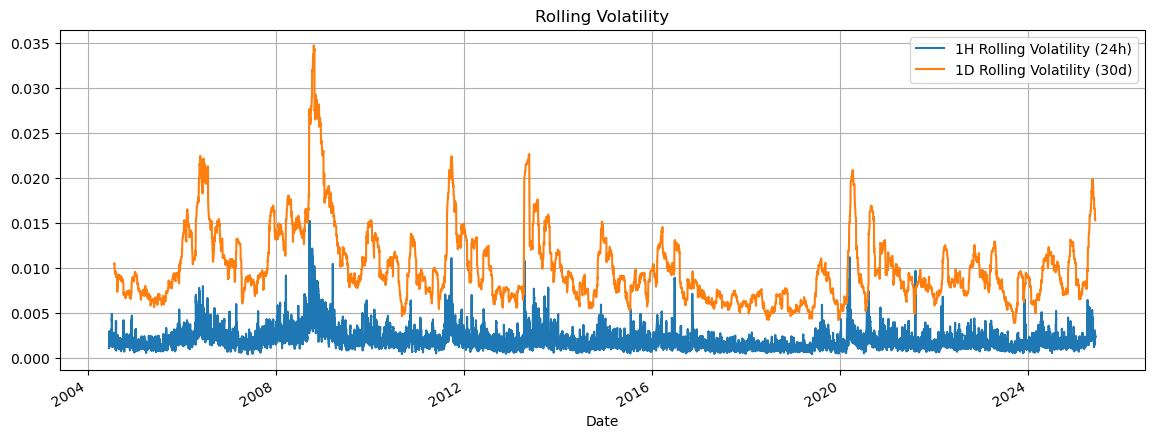

In [4]:
# Rolling Volatility 
df_1h['volatility'] = df_1h['Return'].rolling(window=24).std()
df_1d['volatility'] = df_1d['Return'].rolling(window=30).std()

plt.figure(figsize=(14,5))
df_1h['volatility'].plot(label='1H Rolling Volatility (24h)')
df_1d['volatility'].plot(label='1D Rolling Volatility (30d)')
plt.legend()
plt.title("Rolling Volatility")
plt.grid(True)
plt.show()



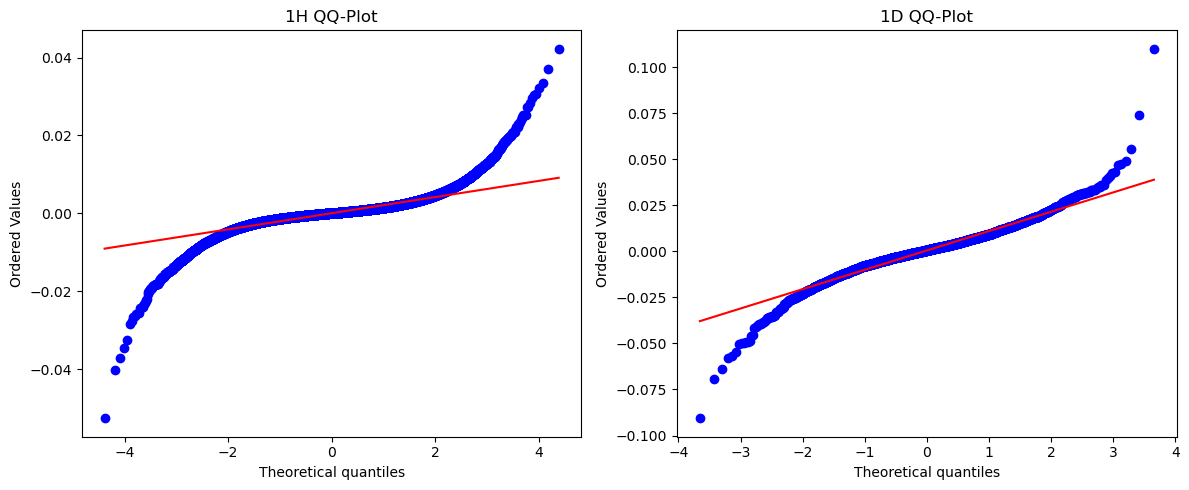

In [5]:
# QQ-Plot 
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
probplot(df_1h['Return'].dropna(), dist="norm", plot=plt)
plt.title("1H QQ-Plot")

plt.subplot(1, 2, 2)
probplot(df_1d['Return'].dropna(), dist="norm", plot=plt)
plt.title("1D QQ-Plot")
plt.tight_layout()
plt.show()